# MNIST

## 获取MNIST数据集
新版本代码

In [5]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version=1)

d:\working\handson-ml-exercise\env38\lib\site-packages\sklearn\datasets\_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


In [ ]:
mnist.keys()

## 出现错误：EOFError: Compressed file ended before the end-of-stream marker was reached

## 错误原因
文件下载中断后重新下载，或者文件已经下载完成，就会产生该错误。
## 解决办法
删除已经下载的文件

也可以手动下载文件放到home目录

In [8]:
from sklearn.datasets import get_data_home

In [9]:
print(get_data_home())

C:\Users\bin_he4\scikit_learn_data


In [10]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [11]:
X, y = mnist["data"], mnist["target"]

In [22]:
X.shape, y.shape

((70000, 784), (70000,))

In [34]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are 70,000 images, and each image has 784 features. This is because each image
is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black).

display it using Matplotlib’s imshow() function

In [14]:
import matplotlib as mpl

In [15]:
import matplotlib.pyplot as plt

In [39]:
import numpy as np

In [48]:
some_digit = X.values[0]

In [49]:
some_digit_image = some_digit.reshape(28, 28)

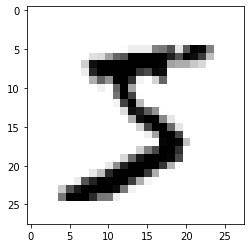

In [50]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")

(0.0, 1.0, 0.0, 1.0)

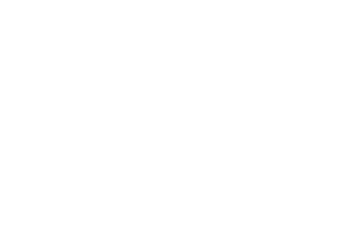

In [51]:
plt.axis("off")

In [53]:
plt.show()

Check the data label

In [54]:
y[0]

'5'

cast y to integers

In [55]:
y = y.astype(np.uint8)

In [56]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint64

The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images)

In [57]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#  Binary Classier

This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5. 

In [58]:
y_train_5 = (y_train == 5) 

In [59]:
y_test_5 = (y_test == 5)

A good place to start is with a Stochastic
Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class.

In [60]:
from sklearn.linear_model import SGDClassifier

In [61]:
sgd_clf = SGDClassifier(random_state=42)

In [62]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [63]:
sgd_clf.predict([some_digit])

array([ True])

The classifier guesses that this image represents a 5 (True).

# Performance Measures

## Cross-Validation

Let’s use the ```cross_val_score()``` function to evaluate your SGDClassifier model
using K-fold cross-validation, with three folds.

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

##  Confusion Matrix

In [67]:
from sklearn.model_selection import cross_val_predict

In [68]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Just like the cross_val_score() function, cross_val_predict() performs K-fold
cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold

Now you are ready to get the confusion matrix using the confusion_matrix() function.

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

The first row of this matrix considers non-5 images (the negative class): 53,057 of them were correctly classified as non-5s (they are called true negatives), while the remaining 1,522 were wrongly classified as 5s (false positives).
        
The second row considers the images of 5s (the positive class): 1,325 were wrongly classified as non-5s (false negatives), while the remaining 4,096 were correctly classi‐
fied as 5s (true positives). 

A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diago‐
nal (top left to bottom right)

![](images/Figure_3-2_An_illustrated_confusion_matrix.png)

recall, also called sensitivity or true positive rate (TPR)

## Precision and Recall

Scikit-Learn provides several functions to compute classifier metrics, including precision and recall

In [71]:
from sklearn.metrics import precision_score, recall_score

In [72]:
 precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [73]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

To compute the F1  score, simply call the f1_score() function

In [74]:
 from sklearn.metrics import f1_score

In [75]:
 f1_score(y_train_5, y_train_pred)

0.7325171197343846

## Precision/Recall Tradeof

Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s
predict() method, you can call its decision_function() method, which returns a score for each instance, and then make predictions based on those scores using any
threshold you want

In [78]:
 y_scores = sgd_clf.decision_function([some_digit])

In [79]:
 y_scores

array([2164.22030239])

In [80]:
threshold = 0

In [81]:
y_some_digit_pred = (y_scores > threshold)

In [82]:
y_some_digit_pred

array([ True])

Let’s raise the threshold:

In [83]:
threshold = 8000

In [84]:
y_some_digit_pred = (y_scores > threshold)

In [85]:
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall.

In [86]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
 method="decision_function")


In [87]:
from sklearn.metrics import precision_recall_curve

In [88]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [89]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")


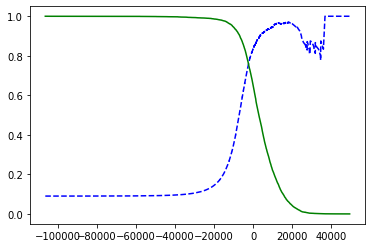

In [90]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [91]:
plt.show()

Another way to select a good precision/recall tradeoff is to plot precision directly against recall

## The ROC Curve

To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the roc_curve() function

In [92]:
from sklearn.metrics import roc_curve

In [93]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [94]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

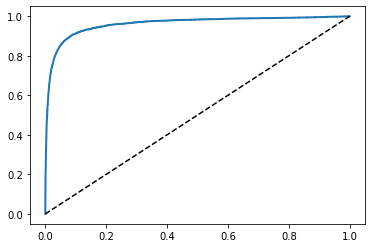

In [95]:
plot_roc_curve(fpr, tpr)
plt.show()

In [96]:
 from sklearn.metrics import roc_auc_score

In [97]:
 roc_auc_score(y_train_5, y_scores)

0.9604938554008616